# U2_Tarea_Selenium
### Tarea de evaluación para la Unidad 2 de Analísis de Datos y Machine Learning | 19130949 Nesim Murillo

El presente trabajo automatiza la tarea de comparar los precios de varios productos de la misma categoría en la página de Mercado Libre, en este caso, se comparan varias consolas de videojuegos según su precio en el momento de correr el programa.

In [1]:
# Importar las bibliotecas necesarias
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import matplotlib.pyplot as plt
import re

In [4]:
# Iniciar el navegador Firefox
driver = webdriver.Firefox()

9699
6699
5840
5499
8803


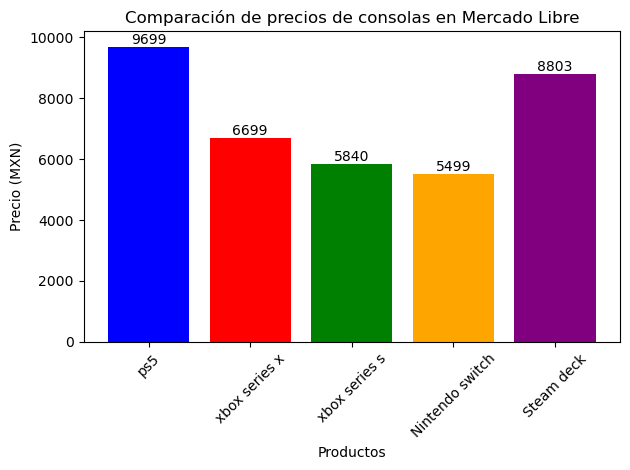

In [5]:
# Lista de productos a buscar en Mercado Libre, 5 consolas de videojuegos en nuestro caso
productos = ["ps5", "xbox series x", "xbox series s", "Nintendo switch", "Steam deck"]

# Diccionario para almacenar los precios de los productos
precios = {}

# Iteramos sobre cada producto en la lista para obtener su información
for producto in productos:
    # Buscamos el producto en la página de Mercado Libre
    driver.get(f'https://listado.mercadolibre.com.mx/{producto}')
    
    # Esperamos unos segundos para que la página cargue completamente
    time.sleep(5)
    
    # Obtenemos el precio del primer producto en la lista
    #En este caso, buscamos el elemento que contiene el precio con el locator tipo  CSS Selector.
    precio_element = driver.find_element(By.CSS_SELECTOR, '.ui-search-price__second-line')
    precio = precio_element.text
    precio_num = re.search(r'\d+(,\d+)?', precio).group() # Una limpieza rápida para quedarnos sólo con el precio
    #y evitar datos como el típico "30% off"
    
    precio_numerico = precio_num.replace(',', '')
    
    precio_numerico = int(precio_numerico)

    print(precio_numerico)
    
    # Almacenamos el precio en el diccionario de precios
    #precios[producto] = float(precio.replace('$', '').replace(',', ''))
    precios[producto] = precio_numerico
    
# Cerramos el navegador y finalizamos la sesión del driver
driver.quit()

# Por acá un ordenamiento por si deseamos ver las consolas ordenadas por precio
 #precios_ordenados = dict(sorted(precios.items(), key=lambda item: item[1]))

# Creamos la gráfica de barras
plt.bar(precios.keys(), precios.values(), color=['blue', 'red', 'green', 'orange', 'purple'])
plt.xlabel('Productos')
plt.ylabel('Precio (MXN)')
plt.title('Comparación de precios de consolas en Mercado Libre')
plt.xticks(rotation=45)
plt.ylim(0, max(precios.values()) + 500)  # Establecemos el rango del eje Y para que no empiece en ceros
plt.tight_layout()

# De una vez, vamos a agregar etiquetas a las barras para que sea más claro..
for producto, precio in precios.items():
    plt.text(producto, precio, str(precio), ha='center', va='bottom')


# Mostramos la gráfica
plt.show()


En la gráfica podemos ver a detalle el precio actual de cada consola para así compararlas juntas y analizar cuál será nuestra próxima compra. ;)

Nota: algunas veces me topé con una excepción relacionada a un "máximo número de requests" realizadas por el driver, por si se lo llega a topar tras ejecutarlo algunas veces, yo lo arreglaba sólo cerrando Jupyter y volviendo a iniciar. :D